In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re

def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
        
    return (data)
def load_data(file):
  df=pd.read_csv('')
  return df

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

def remove_stops(text, stops):
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    stops = stopwords.words("english")
    months = load_data("data/months.json")
    stops = stops+months
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

descriptions = load_data("data/trc_dn.json")["descriptions"]
names = load_data("data/trc_dn.json")["names"]

# print (descriptions[0])

cleaned_docs = clean_docs(descriptions)
# print (cleaned_docs[0])

vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (descriptions[0])
print (all_keywords[0])

true_k = 20

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open ("data/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")






In [2]:
#importing library 
import pandas as pd #loading dataframe 
import numpy as np  #for mathematical calculations

import matplotlib.pyplot as plt #visualization 
import seaborn as sns #visualization 
import zipfile #for extracting the zip file datasets 

import gensim #library for topic modelling 
from gensim.models import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


import nltk   #natural language toolkit for preprocessing the text data

from nltk.stem import WordNetLemmatizer   #used to Lemmatize using WordNet's    #built-in morphy function.Returns the input word unchanged if it cannot #be found in WordNet. 

from nltk.stem import SnowballStemmer #used for stemming in NLP
from nltk.stem.porter import * #porter stemming 

from wordcloud import WordCloud #visualization techniques for #frequently repeated texts 

nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
!pip install pyLDAvis

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Britiesh_airways/processed.csv')

In [ ]:
data.head(3)

In [7]:
del data['Unnamed: 0']

In [8]:
data.head()

,reviews
0,| Flying LHR T5 to CPT November 2022: BA ap...
1,| Worst experience ever. Outbound flight was ...
2,"| Check in was a shambles at BWI, just 3 cou..."
3,| Beyond disgusted with the fact that my bagg...
4,| On July 19th 2022 I had submitted a complai...


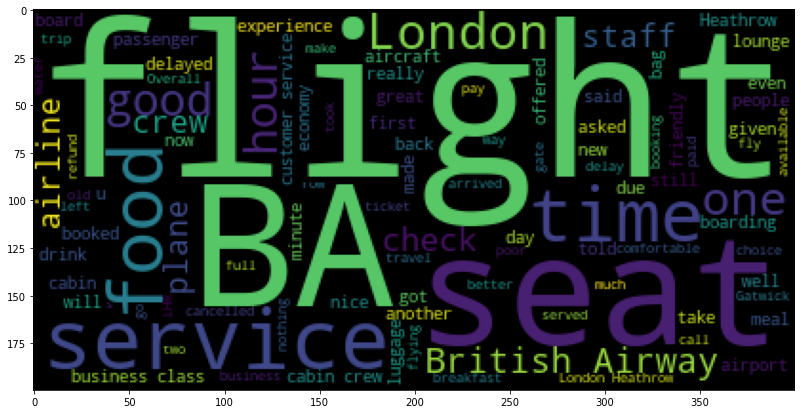

In [9]:
#word cloud visualization for the headline_text 
wc = WordCloud(
    background_color='black',
    max_words = 100, 
    random_state = 42,
    max_font_size=110
    )
wc.generate(' '.join(data['reviews']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [10]:
#function to perform the pre processing steps on the  dataset
#stemming

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [11]:
# Tokenize and lemmatize

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            #Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
#calling the preprocess function above 
processed_docs = data['reviews'].map(preprocess)
processed_docs[:10]

0    [fli, novemb, websit, work, proper, load, tick...
1    [worst, experi, outbound, flight, cancel, noti...
2    [check, shambl, counter, open, flight, drop, q...
3    [disgust, fact, baggag, deliv, week, email, ca...
4    [juli, submit, complaint, form, regard, fact, ...
5    [book, flight, cancel, flight, learn, entri, v...
6    [london, gibraltar, octob, book, flight, month...
7    [general, loyal, gold, status, flyer, rout, re...
8    [great, flight, suit, aircraft, provid, maximu...
9    [happi, flight, good, second, rate, euro, busi...
Name: reviews, dtype: object

In [15]:
#create dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)

In [16]:
#Create the Bag-of-words(BoW) model for each document
document_num = 4310
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
bow_corpus[0]

In [31]:
#Modelling part
lda_model = gensim.models.LdaMulticore(bow_corpus[:-1], 
                                       num_topics=7, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [32]:
#Here it should give you a ten topics as example shown below image
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.036*"flight" + 0.015*"staff" + 0.013*"check" + 0.011*"hour" + 0.011*"london" + 0.010*"servic" + 0.010*"board" + 0.009*"time" + 0.009*"crew" + 0.007*"heathrow"


Topic: 1 
Words: 0.021*"flight" + 0.014*"seat" + 0.012*"london" + 0.011*"servic" + 0.010*"time" + 0.009*"check" + 0.008*"busi" + 0.008*"cabin" + 0.007*"crew" + 0.007*"custom"


Topic: 2 
Words: 0.028*"flight" + 0.022*"seat" + 0.014*"class" + 0.012*"london" + 0.011*"time" + 0.010*"board" + 0.009*"servic" + 0.009*"crew" + 0.009*"food" + 0.008*"cabin"


Topic: 3 
Words: 0.018*"servic" + 0.016*"london" + 0.013*"flight" + 0.012*"custom" + 0.011*"busi" + 0.011*"seat" + 0.011*"food" + 0.010*"airlin" + 0.009*"british" + 0.008*"class"


Topic: 4 
Words: 0.030*"seat" + 0.023*"flight" + 0.013*"servic" + 0.011*"food" + 0.011*"good" + 0.010*"crew" + 0.010*"class" + 0.009*"economi" + 0.009*"busi" + 0.009*"cabin"


Topic: 5 
Words: 0.059*"flight" + 0.015*"hour" + 0.014*"london" + 0.012*"airway" + 0.011*"british" + 0.011*"se

In [33]:
#saving model
lda_model.save('/content/drive/MyDrive/Britiesh_airways/model_1.model')

In [30]:
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.enable_notebook()
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.027616  0.008977       1        1  25.072801
3      0.018121  0.016024       2        1  19.426536
2      0.058259  0.010825       3        1  14.837655
1      0.034507 -0.005854       4        1  13.042558
6     -0.061505  0.020805       5        1  11.022279
5     -0.006050  0.001095       6        1  10.559716
4     -0.015715 -0.051872       7        1   6.038455, topic_info=       Term         Freq        Total Category  logprob  loglift
70     seat  1024.000000  1024.000000  Default  30.0000  30.0000
94   flight  1901.000000  1901.000000  Default  29.0000  29.0000
322    crew   492.000000   492.000000  Default  28.0000  28.0000
205    book   318.000000   318.000000  Default  27.0000  27.0000
244  london   646.000000   646.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
13    check    20.061621   422.079245   Topic7  -5.1816  -0.2394
42     hour    19.069798   471.661510   Topic7  -5.2323  -0.4011
33      fli    15.690814   279.863439   Topic7  -5.4273  -0.0742
126    meal    14.388570   249.611466   Topic7  -5.5140  -0.0464
119    good    16.013952   439.073914   Topic7  -5.4069  -0.5042

[600 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
259       2  0.699825   abysm
259       3  0.139965   abysm
259       4  0.139965   abysm
1180      2  0.747546   accur
3360      5  0.525662     ach
...     ...       ...     ...
171       6  0.132061   world
171       7  0.023305   world
2976      1  0.640080  zurich
2976      2  0.182880  zurich
2976      4  0.091440  zurich

[1455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 7, 6, 5])

In [28]:
#for 10 clusters

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.047733  0.024016       1        1  21.875591
5      0.005817  0.005949       2        1  12.771976
6     -0.003730  0.023282       3        1  12.288149
2      0.026670  0.020807       4        1  11.890227
0      0.005687  0.004437       5        1  10.713093
1     -0.047638  0.032819       6        1   9.851042
9      0.064298 -0.011066       7        1   7.836281
8      0.017468 -0.014917       8        1   5.324137
4      0.024161 -0.009915       9        1   4.426845
7     -0.045000 -0.075412      10        1   3.022657, topic_info=       Term         Freq        Total Category  logprob  loglift
70     seat  1030.000000  1030.000000  Default  30.0000  30.0000
94   flight  1903.000000  1903.000000  Default  29.0000  29.0000
16    class   431.000000   431.000000  Default  28.0000  28.0000
42     hour   477.000000   477.000000  Default  27.0000  27.0000
145    time   555.000000   555.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
33      fli     6.879378   280.958933  Topic10  -5.5598  -0.2106
15    choic     5.630033   140.720008  Topic10  -5.7603   0.2804
213    help     5.867949   183.017425  Topic10  -5.7189   0.0590
34     food     6.880252   498.780123  Topic10  -5.5597  -0.7845
8     board     6.352462   431.257658  Topic10  -5.6395  -0.7188

[860 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3102      3  0.567703    abuja
2712      2  0.279017    accra
2712      4  0.558034    accra
1180      5  0.364586    accur
2936      2  0.671399   action
...     ...       ...      ...
748       7  0.028392    wrong
748       8  0.198744    wrong
748       9  0.028392    wrong
748      10  0.028392    wrong
3482      5  0.558488  younger

[2306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 7, 3, 1, 2, 10, 9, 5, 8])